In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [201]:
class SLP:
    def __init__(self, learning_rate=0.01, num_epochs=100000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_in = X.shape[1]
        n_out = 1
        
        # Xavier Initialization
        limit = np.sqrt(6 / (n_in + n_out))
        self._w = np.random.uniform(-limit, limit, size=(n_in, n_out))
        self._b = 0.0

        # propagate
        for epoch in range(self.num_epochs):
            m = X.shape[0]
            A = 1 / (1 + np.exp(-(np.dot(X, self._w) + self._b)))
            cost = (-1 / m) * np.sum(np.dot(y, np.log(A)) + np.dot(1 - y, np.log(1 - A)))
            dw = (1 / m) * np.dot(X.T, (A - y.reshape(-1, 1)))
            db = (1 / m) * np.sum(A - y.reshape(-1, 1))

            # update rule
            self._w = self._w - self.learning_rate * dw
            self._b = self._b - self.learning_rate * db
            
            if epoch % 10000 == 0:
                print(f"Cost after epoch {epoch} = {cost}")
                print(f"Weights after epoch {epoch}: w1 = {self._w[0, 0]} w2 = {self._w[1, 0]}")
                print(f"Bias after epoch {epoch} = {self._b}")
                print()
                
        print(f"Cost after epoch {self.num_epochs} = {cost}")
        print(f"Weights after epoch {self.num_epochs}: w1 = {self._w[0, 0]} w2 = {self._w[1, 0]}")
        print(f"Bias after epoch {self.num_epochs} = {self._b}")
        print()
            
    def predict(self, X):
        X = np.array(X)
        m = X.shape[0]
        y_prediction = np.zeros((m, 1))
        A = 1 / (1 + np.exp(-(np.dot(X, self._w) + self._b)))

        for i in range(A.shape[0]):
            if A[i, 0] > 0.5 :
                y_prediction[i, 0] = 1
            else:
                y_prediction[i, 0] = 0
                
        return y_prediction

In [202]:
def plot_classes(df):
    class_0 = df[df[2] == 0]
    class_1 = df[df[2] == 1]

    # Create two separate scatter plots for 'feature1' and 'feature2'.
    plt.figure(figsize=(12, 5))

    # Scatter plot for 'feature1'
    plt.subplot(1, 2, 1)
    plt.scatter(class_0[0], class_0[1], color='yellow', label='Class 0')
    plt.scatter(class_1[0], class_1[1], color='blue', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    plt.tight_layout()  # Ensures proper spacing between subplots
    plt.show()

In [203]:
def plot_decision_bound(df, model):
    weights = model._w
    bias = model._b

    # Plot the data points
    class_0 = df[df[2] == 0]
    class_1 = df[df[2] == 1]

    plt.figure(figsize=(8, 6))

    # Scatter plot for 'feature1' and 'feature2'
    plt.scatter(class_0[0], class_0[1], color='yellow', label='Class 0')
    plt.scatter(class_1[0], class_1[1], color='blue', label='Class 1')

    # Define a range of values for 'feature1' to draw the decision boundary line
    feature1_values = np.linspace(0, 1, 100)

    # Calculate 'feature2' values for the decision boundary using the SLP equation
    # SLP equation: w1 * feature1 + w2 * feature2 + b = 0
    # Solving for feature2: feature2 = (-w1 * feature1 - b) / w2
    decision_boundary = (-weights[0] * feature1_values - bias) / weights[1]

    # Plot the decision boundary line
    plt.plot(feature1_values, decision_boundary, color='red', linestyle='--', label='Decision Boundary')
    
    plt.ylim(df[1].min() - 0.1, df[1].max() + 0.1)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

In [204]:
def accuracy(y_pred, y_true):
    correct_predictions = sum(1 for pred, true in zip(y_pred, y_true) if pred == true)
    total_values = len(y_true)
    accuracy = correct_predictions / total_values
    
    return accuracy

In [205]:
file_path = './data/data09.csv'
df = pd.read_csv(file_path, header=None, delimiter=';')
df.head()

,0,1,2
0,0.774,0.288,1
1,0.989,0.480,1
2,0.135,0.419,0
3,0.802,0.395,1
4,0.924,0.172,1


In [206]:
df[2].value_counts()

2
0    55
1    45
Name: count, dtype: int64

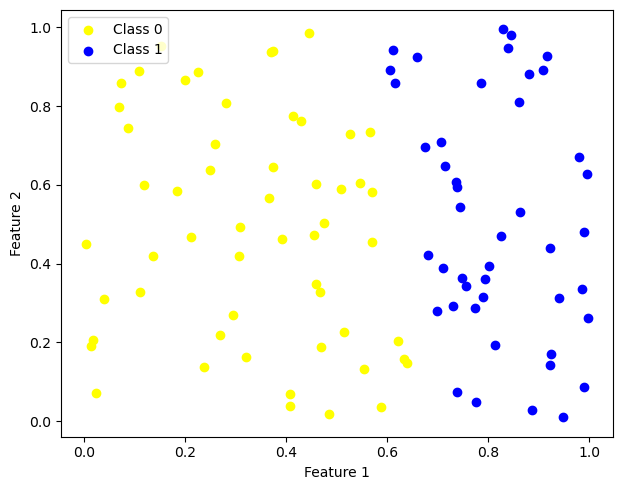

In [207]:
plot_classes(df)

In [208]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [209]:
model = SLP()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy on test data: {accuracy(y_pred, y_test)}")

(2, 1)
Cost after epoch 0 = 0.8374190717533929
Weights after epoch 0: w1 = -1.0158644241339156 w2 = 0.3821797843939649
Bias after epoch 0 = 0.0007454118286778236

Cost after epoch 10000 = 0.30748581298080147
Weights after epoch 10000: w1 = 4.9966342926969896 w2 = -0.2814605190331954
Bias after epoch 10000 = -2.6807692810069965

Cost after epoch 20000 = 0.22226235443927325
Weights after epoch 20000: w1 = 7.434407363494823 w2 = -0.1654634435261812
Bias after epoch 20000 = -4.226132134102853

Cost after epoch 30000 = 0.1832653018764143
Weights after epoch 30000: w1 = 9.060762674495463 w2 = 0.010684138463961823
Bias after epoch 30000 = -5.31930635557332

Cost after epoch 40000 = 0.15969496545499376
Weights after epoch 40000: w1 = 10.318305759452073 w2 = 0.17299130794640863
Bias after epoch 40000 = -6.179814241137793

Cost after epoch 50000 = 0.14347777014383575
Weights after epoch 50000: w1 = 11.359728687511673 w2 = 0.3147733299699162
Bias after epoch 50000 = -6.89632030378321

Cost after 

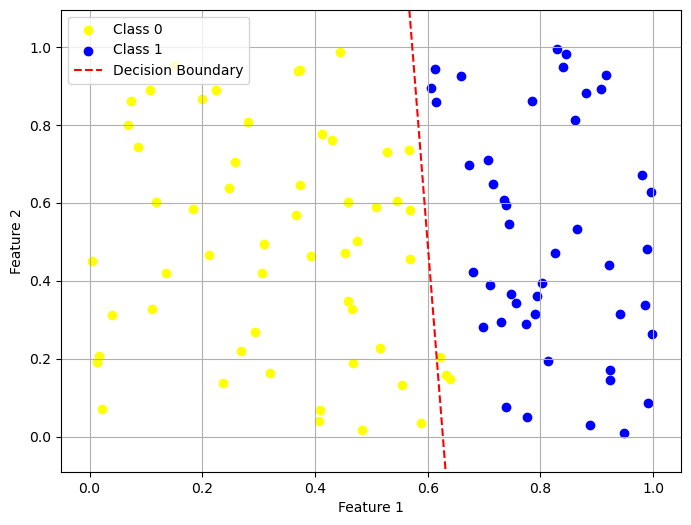

In [210]:
plot_decision_bound(df, model)

In [211]:
perceptron = Perceptron(max_iter=100000, eta0=0.01, random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc = accuracy(y_pred, y_test)
print(f"Accuracy: {acc}")

Accuracy: 0.8666666666666667
